In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\padal\OneDrive\Desktop\Data Science\shopping_data.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


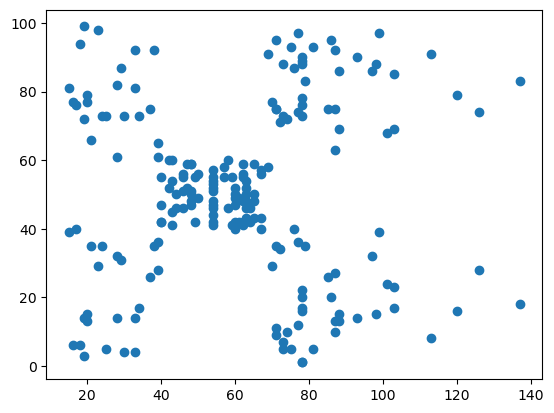

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0:1],X.iloc[:,1:2])
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage='single')
df["single"] = agg_cluster.fit_predict(X)

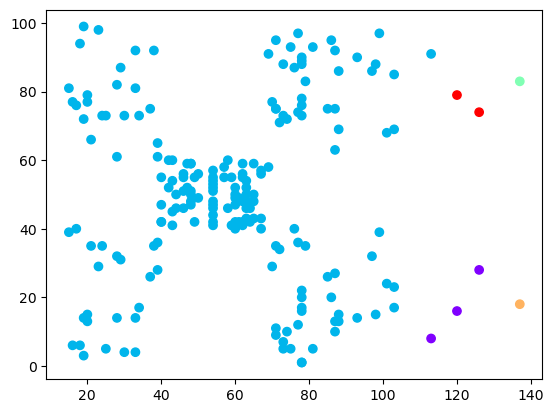

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df["single"], cmap='rainbow')  
plt.show()

In [6]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["single"])
print("single linkage score:", np.round(score,3))

single linkage score: 0.269


In [7]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage="complete")
df["complete"] = agg_cluster.fit_predict(X)

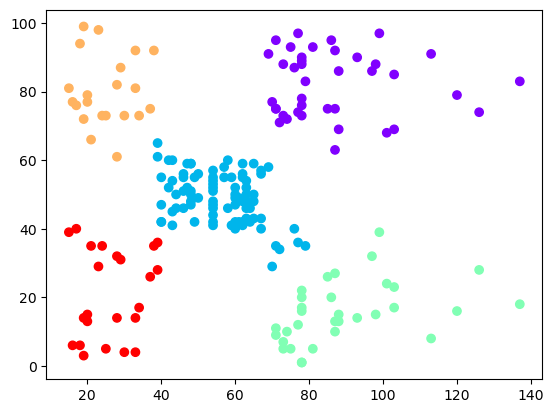

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df["complete"], cmap='rainbow')  
plt.show()

In [9]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["complete"])
print("complete linkage score:", np.round(score,3))

complete linkage score: 0.553


In [10]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage='average')
df["average"] = agg_cluster.fit_predict(X)

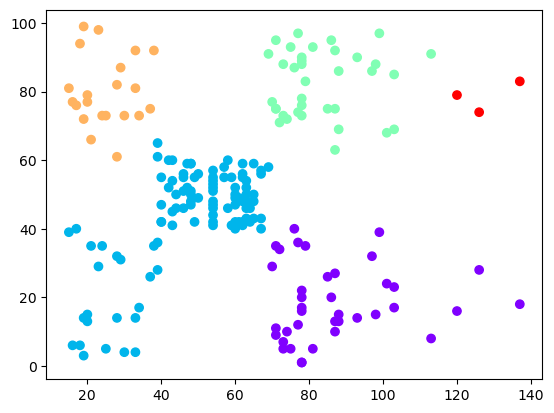

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df["average"], cmap='rainbow')  
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["average"])
print("average linkage score:", np.round(score,3))

average linkage score: 0.479


In [13]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
df["ward"] = agg_cluster.fit_predict(X)

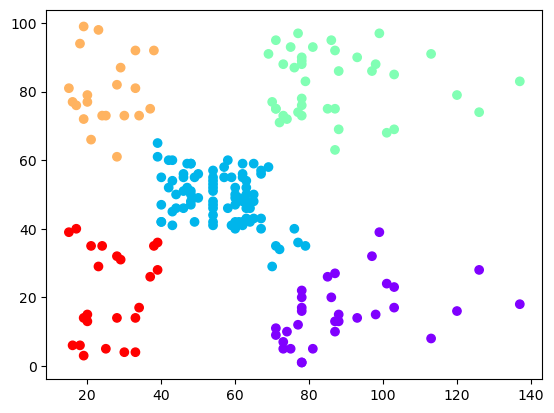

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df["ward"], cmap='rainbow')  
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["ward"])
print("ward linkage score:", np.round(score,3))

ward linkage score: 0.553


In [16]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=5)

In [17]:
df["K_5"] = K_cluster.fit_predict(X)

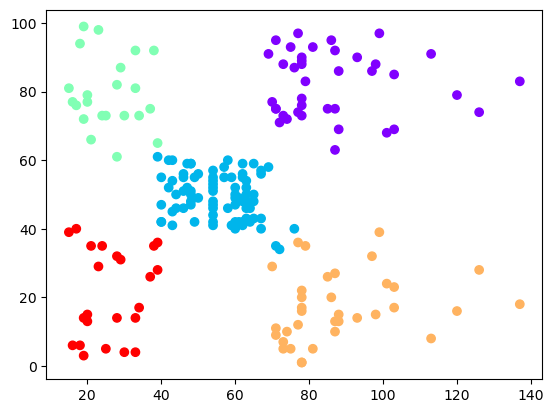

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df["K_5"], cmap='rainbow')  
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_5"])
print("K_5 score:", np.round(score,3))

K_5 score: 0.554


In [20]:
scores = []

In [21]:
for i in range(2,11,1):
    from sklearn.cluster import KMeans
    K_cluster = KMeans(n_clusters=i)
    df["K_5"] = K_cluster.fit_predict(X)
    from sklearn.metrics import silhouette_score
    scores.append(silhouette_score(X,df["K_5"]))

In [22]:
np.round(scores,3)

array([0.297, 0.468, 0.493, 0.554, 0.538, 0.529, 0.457, 0.457, 0.448])

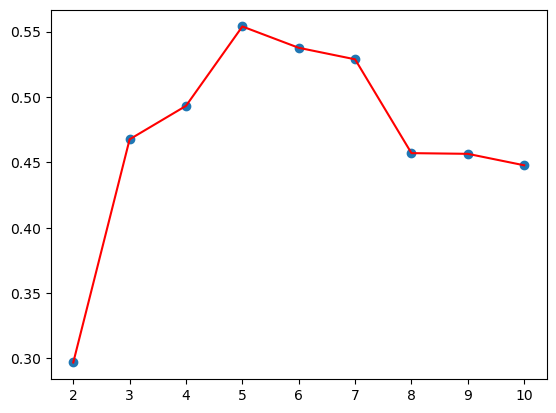

In [23]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11,1),scores)    
plt.plot(range(2,11,1),scores,color='red')
plt.show()